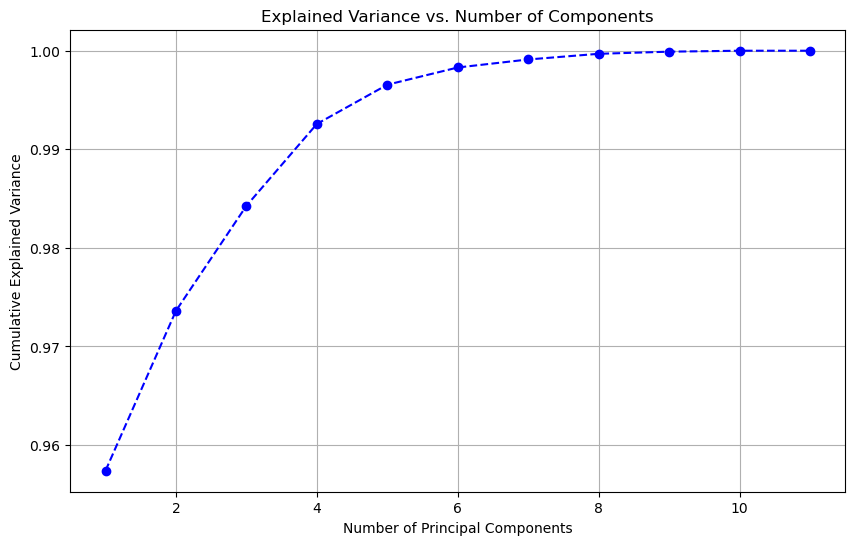

Optimal number of components for 95% explained variance: 1
['W' 'L' 'W' 'W' 'L' 'W' 'L' 'W' 'W' 'W' 'L' 'L']

 0     W
2     W
4     W
6     W
8     W
10    W
12    L
14    L
16    L
18    L
20    L
22    L
Name: Result, dtype: object


0.5833333333333334

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_distances = pd.read_csv(r'.\\FULLDATASET.csv')

even = np.arange(0,23,2)
odd = np.arange(1,23,2)

X_train = df_distances.loc[odd, 'Distance (1 to 2)':'Distance (67 to 68)']
y_train = df_distances.loc[odd,'Result']

X_test = df_distances.loc[even, 'Distance (1 to 2)':'Distance (67 to 68)']
y_test = df_distances.loc[even,'Result']

# Standardize features before PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Calculate cumulative explained variance
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Choose the number of components based on the graph (e.g., 95% explained variance)
optimal_components = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f"Optimal number of components for 95% explained variance: {optimal_components}")

# Apply PCA with the chosen number of components
pca = PCA(n_components=optimal_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


cl = MLPClassifier(random_state=50, max_iter=10000).fit(X_train, y_train)

print(cl.predict(X_test))
print('\n',y_test.T)
cl.score(X_test,y_test)